In [1]:
# Standard 
import os, sys , copy ,shutil, logging, csv, json, logging
logger = logging.getLogger()
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from scipy import optimize


# Import all the streamm modules
from streamm import *

%load_ext autoreload
%autoreload 2

In [2]:
from streamm import values

In [3]:
from scipy import stats

In [4]:
local = resource.Resource('local')
local.load_json()

peregrine = resource.Resource('peregrine')
peregrine.load_json()

Reading in resource json file res_local.json 
Reading in resource json file res_peregrine.json 


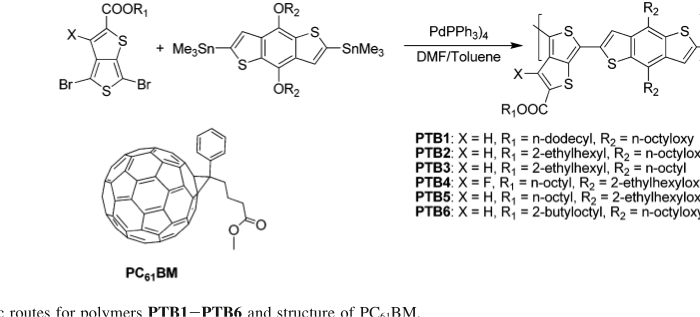

In [5]:
from IPython.display import Image
Image(filename=local.dir['home']+'/figures/PTBX.png')

In [6]:
os.getcwd()

'/Users/tkemper/Projects/DApolymers/notebooks'

In [7]:
proj_suf = "tsDAfs10"

In [8]:
proj_i = project.Project("DAPpolymers_%s"%(proj_suf))

In [9]:
proj_i.load_json()

Resource tag found peregrine 
Reading in resource json file res_peregrine.json 
Resource tag found peregrine 
Reading in resource json file res_peregrine.json 
Resource tag found peregrine 
Reading in resource json file res_peregrine.json 
Resource tag found peregrine 
Reading in resource json file res_peregrine.json 
Resource tag found peregrine 
Reading in resource json file res_peregrine.json 
Resource tag found peregrine 
Reading in resource json file res_peregrine.json 


In [10]:
for tag_i,calc_i in proj_i.calculations.iteritems():
    print tag_i,calc_i.meta['status'],calc_i.properties['name']

D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_tsDAfs10 stored PTB7
D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_tsDAfs10 stored PTB4
D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_tsDAfs10 stored PTB5
D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_tsDAfs10 stored BDTTPD
D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_tsDAfs10 stored PTB1
D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_tsDAfs10 stored PCE10


In [ ]:
proj_i.set_resource(local)

In [ ]:
tags = []
tags.append('D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_tsDAfs10')
tags.append('D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_tsDAfs10')
tags.append('D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_tsDAfs10')
tags.append('D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_tsDAfs10')
tags.append('D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_tsDAfs10')
tags.append('D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_tsDAfs10')


In [ ]:
proj_i.calculations['D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_tsDAfs10'].properties['name'] = 'BDT-TPD'
proj_i.calculations['D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_tsDAfs10'].properties['name'] = 'PTB5'
proj_i.calculations['D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_tsDAfs10'].properties['name'] = 'PTB4'
proj_i.calculations['D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_tsDAfs10'].properties['name'] = 'PTB7'
proj_i.calculations['D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_tsDAfs10'].properties['name'] = 'PTB1'
proj_i.calculations['D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_tsDAfs10'].properties['name'] = 'PCE10'

In [ ]:
proj_i.calculations = {}

for tag_i in tags:
    print tag_i

    calc_i = calculation.CalculationRes(tag_i)
    calc_i.load_json()
    print calc_i.properties['streamm_command']
    proj_i.calculations[tag_i] = copy.deepcopy(calc_i)

In [ ]:
for tag_i,calc_i in proj_i.calculations.iteritems():
    print tag_i
    #calc_i.check()
    

In [ ]:
for tag_i,calc_i in proj_i.calculations.iteritems():
    print tag_i,calc_i.meta['status']

In [ ]:
for tag_i,calc_i in proj_i.calculations.iteritems():
    calc_i.set_resource(peregrine)

In [ ]:
for tag_i,calc_i in proj_i.calculations.iteritems():
    print calc_i.properties['streamm_command']

In [ ]:
for tag_i,calc_i in proj_i.calculations.iteritems():
    if( calc_i.meta['status'] == 'written' ):
        print tag_i
        calc_i.make_dir()
        calc_i.dir['templates'] = '/Users/tkemper/Development/streamm-tools/templates'
        calc_i.cp_file('templates','run',"streamm_peregrine.pbs",'templates','launch')
        os.chdir(calc_i.dir['launch'])
        calc_i.load_str('templates','run')
        calc_i.properties['walltime'] = 48
        #print calc_i.str['run']
        calc_i.replacewrite_prop('run','scripts','run','%s.pbs'%(calc_i.tag))
        calc_i.push()

    

In [ ]:
for tag_i,calc_i in proj_i.calculations.iteritems():
    if( calc_i.meta['status'] == 'written' ):
        calc_i.run()



In [ ]:
for tag_i,calc_i in proj_i.calculations.iteritems():
    calc_i.check()
    

In [ ]:
for tag_i,calc_i in proj_i.calculations.iteritems():
    calc_i.analysis()
    

In [ ]:
for tag_i,calc_i in proj_i.calculations.iteritems():
    calc_i.store()
    #print calc_i.files['output']
    

In [ ]:
for tag_i,calc_i in proj_i.calculations.iteritems():
    #calc_i.files['output']['']
    print calc_i.pull() 
    

In [12]:
for tag_i,calc_i in proj_i.calculations.iteritems():
    print calc_i.files['output']

{u'mol_time': u'mol.time', u'struc_time': u'Struc_D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_tsDAfs10.time', u'mol_cm_xyz': u'mol_cm.xyz', u'compressed': u'D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_tsDAfs10_output.tgz', u'log': u'D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_tsDAfs10.log'}
{u'mol_time': u'mol.time', u'struc_time': u'Struc_D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_tsDAfs10.time', u'mol_cm_xyz': u'mol_cm.xyz', u'compressed': u'D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_tsDAfs10_output.tgz', u'log': u'D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_tsDAfs10.log'}
{u'mol_time': u'mol.time', u'struc_time': u'Struc_D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_tsDAfs10.time', u'mol_cm_xyz': u'mol_cm.xyz', u'compressed': u'D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_tsDAfs10_output.tgz', u'log': u'D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_tsDAfs10.log'}
{u'mol_time': u'mol.time', u'struc_time': u'Struc_D1_R2R200_A

In [18]:
for tag_i,calc_i in proj_i.calculations.iteritems():
    t1 = tag_i.split('_x')
    t2 = t1[1].split('_')
    calc_i.properties['nmol'] = int(t2[0])


In [20]:
for tag_i,calc_i in proj_i.calculations.iteritems():
    print tag_i,calc_i.properties['nmol']



D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_tsDAfs10 193
D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_tsDAfs10 193
D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_tsDAfs10 193
D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_tsDAfs10 197
D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_tsDAfs10 173
D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_tsDAfs10 173


In [39]:
proj_i.calculations['D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_tsDAfs10'].properties['name'] = 'BDT-TPD'

In [38]:
for tag_i,calc_i in proj_i.calculations.iteritems():
    print tag_i,calc_i.properties['name']



D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_tsDAfs10 PTB7
D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_tsDAfs10 PTB4
D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_tsDAfs10 PTB5
D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_tsDAfs10 BDTTPD
D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_tsDAfs10 PTB1
D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_tsDAfs10 PCE10


In [13]:
for tag_i,calc_i in proj_i.calculations.iteritems():
    os.chdir(calc_i.dir['launch'])
    calc_i.ts = pd.read_csv(calc_i.files['output']['struc_time'])

In [31]:
    print calc_i.ts.columns

Index([u'frame', u'volume', u'density'], dtype='object')


In [35]:
name_l = []
name_l.append('BDT-TPD')
name_l.append('PTB1')
name_l.append('PTB5')
name_l.append('PTB4')
name_l.append('PTB7')
name_l.append('PCE10')

In [19]:
for tag_i,calc_i in proj_i.calculations.iteritems():
    print calc_i.ts['density'].mean(),calc_i.ts['density'].std(),calc_i.properties['nmol']


1.14735797194 0.00154470321338 193
1.15352867036 0.00148446797767 193
1.13296996393 0.00164693054686 193
1.12145749794 0.00121135996824 197
1.09477310566 0.00142843893525 173
1.16477486525 0.00146840881186 173


In [40]:
table_lines = ' Polymer & $n$ & $<\\rho>$ ($\sigma$) \\\\ \\hline \n'
for name_i in name_l:
    calc_i = None 
    for tag_i,calc_o in proj_i.calculations.iteritems():
        if( calc_o.properties['name'] == name_i ):
            calc_i = calc_o

    table_lines += "%s & %d & %5.2f (%6.2e) \\\\ \n"%(calc_i.properties['name'],calc_i.properties['nmol'],calc_i.ts['density'].mean(),calc_i.ts['density'].std())

In [41]:
os.chdir('/Users/tkemper/Projects/DApolymers/tables')
print table_lines

f = open('den_n.tex','w')
f.write(table_lines)
f.close()    
    

 Polymer & $n$ & $<\rho>$ ($\sigma$) \\ \hline 
BDT-TPD & 197 &  1.12 (1.21e-03) \\ 
PTB1 & 173 &  1.09 (1.43e-03) \\ 
PTB5 & 193 &  1.13 (1.65e-03) \\ 
PTB4 & 193 &  1.15 (1.48e-03) \\ 
PTB7 & 193 &  1.15 (1.54e-03) \\ 
PCE10 & 173 &  1.16 (1.47e-03) \\ 



In [ ]:
print molts_df.columns

In [33]:
for tag_i,calc_i in proj_i.calculations.iteritems():
    os.chdir(calc_i.dir['launch'])
    calc_i.molts_df = pd.read_csv(calc_i.files['output']['mol_time'])    

In [34]:
    calc_i.molts_df.columns

Index([u'frame', u'g_i', u'residue', u'Rgy_eignval', u'A_sphere',
       u'A_sphere_dem', u'r_gy_sq', u'total_mass', u'cent_mass', u'Q_mn',
       u'A_sphere_num', u'radius', u'mol', u'resname', u'dl_sq'],
      dtype='object')

In [ ]:
for tag_i,calc_i in proj_i.calculations.iteritems():
    os.chdir(calc_i.dir['launch'])
    calc_i.molts_df = pd.read_csv(calc_i.files['output']['mol_time'])    
    val_i = values.Values(key_i,molts_df[key_i].values)
    val_i.calc_stats()
    val_i.set_bins(0.01)
    val_i.calc_hist()
    val_dic[calc_i.properties['name']] = copy.deepcopy(val_i) 


In [ ]:
for tag_i,calc_i in proj_i.calculations.iteritems():
    os.chdir(calc_i.dir['launch'])
    molts_df = pd.read_csv(calc_i.files['output']['mol_time'])    
    calc_i.properties['nmol'] = molts_df['g_i'].max() + 1
    print calc_i.tag, calc_i.properties['nmol']

In [42]:
os.chdir('/Users/tkemper/Projects/DApolymers/figures')

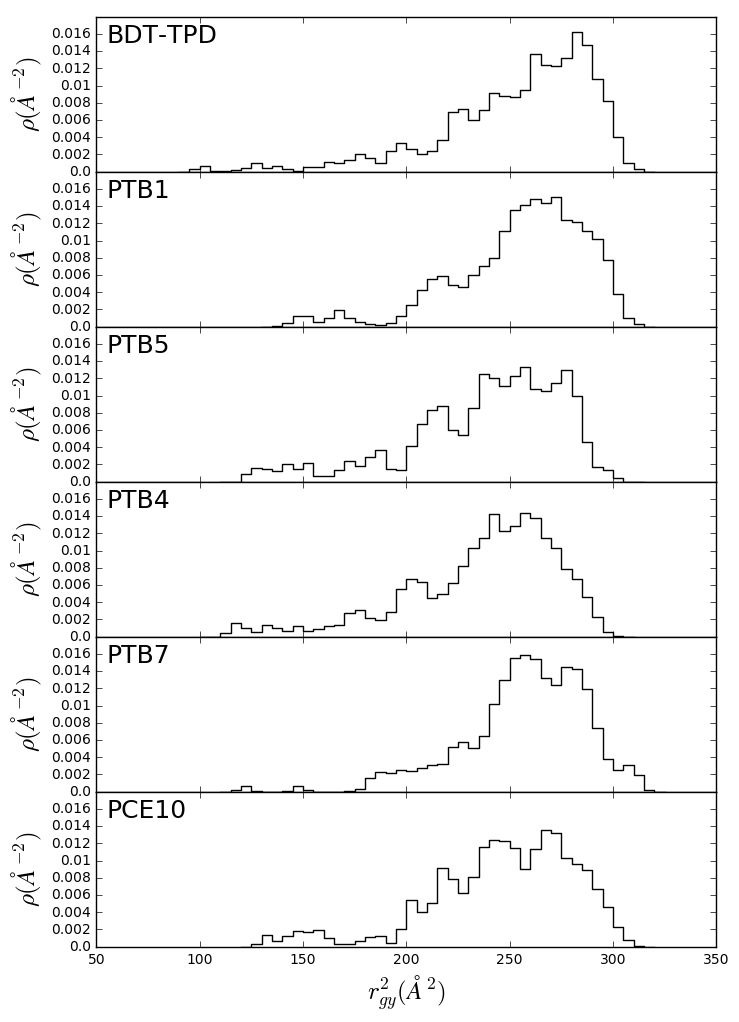

In [53]:
key_i  = 'r_gy_sq'

ms = 3
led_x = 0.015
led_y = 0.001
fontsz_leg = 16
fontsz_text = 18


fig, ax = plt.subplots(6,sharex=True)
#ax.plot(rgy_sq_vals.bin_val,rgy_sq_vals.hist_bin)
#ax.bar(rgy_sq_vals.bins_cent, rgy_sq_vals.hist_cent , align='center', width=rgy_sq_vals.bin_size)
i = 0
for name_i in name_l:
    calc_i = None 

    
    for tag_i,calc_o in proj_i.calculations.iteritems():
        if( calc_o.properties['name'] == name_i  ):
            calc_i = calc_o

    val_i = values.Values(key_i,calc_i.molts_df[key_i].values)
    val_i.calc_stats()
    val_i.set_bins(5.0)
    val_i.calc_hist()
    
    ax[i].plot(val_i.bins_steps,val_i.hist_steps,'k-',ls = "steps")
    
    ax[i].set_xlabel(r'$r_{gy}^2 (\AA^2)$',fontsize=fontsz_text)
    ax[i].set_ylabel(r'$\rho (\AA^{-2})$',fontsize=fontsz_text)
    ax[i].set_xlim(50,350)
    ax[i].set_ylim(0.0,0.018)
    ax[i].text(55,0.015,name_i,fontsize=fontsz_text)

    labels=ax[i].get_yticks().tolist()
    if( i > 0 ):
        labels[-1]=''
    ax[i].set_yticklabels(labels)    

    
    i+=1
    
#i += -1

fig.subplots_adjust(hspace=0.0)   
fig.set_size_inches(8.0, 12.0)

fig.savefig("%s_hist.pdf"%(key_i),format='pdf')



In [111]:
for tag_i,calc_i in proj_i.calculations.iteritems():
    calc_i.molts_df['dl'] = calc_i.molts_df['dl_sq'].apply(lambda x: np.sqrt(x))

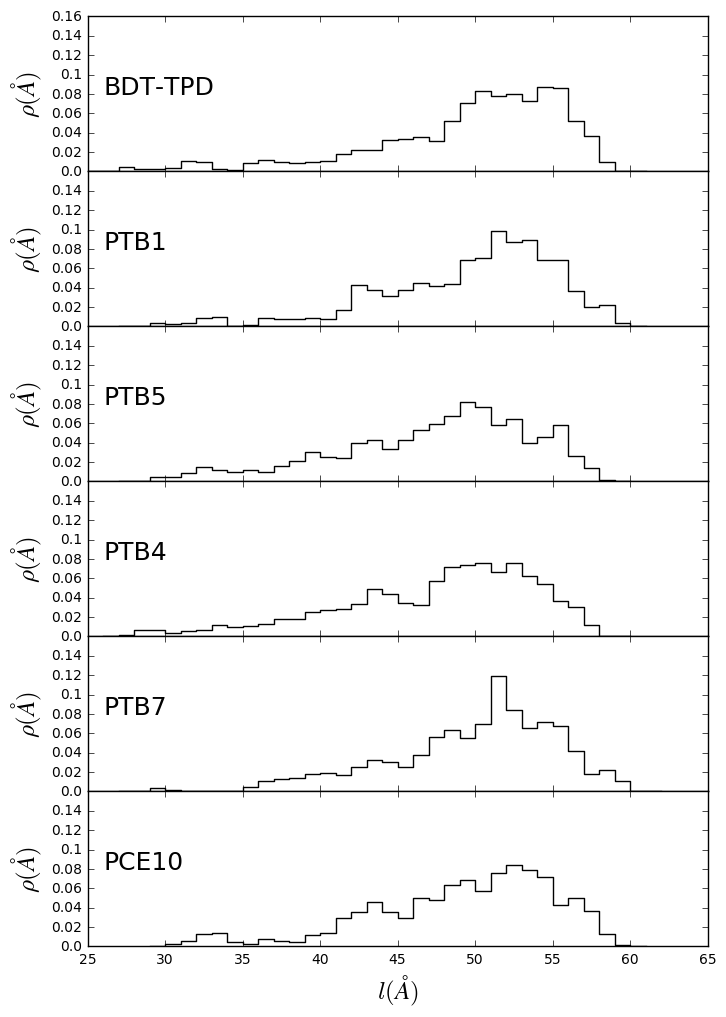

In [82]:
key_i  = 'dl_sq'

ms = 3
led_x = 0.015
led_y = 0.001
fontsz_leg = 16
fontsz_text = 18


fig, ax = plt.subplots(6,sharex=True)
#ax.plot(rgy_sq_vals.bin_val,rgy_sq_vals.hist_bin)
#ax.bar(rgy_sq_vals.bins_cent, rgy_sq_vals.hist_cent , align='center', width=rgy_sq_vals.bin_size)
i = 0
for name_i in name_l:
    calc_i = None 

    
    for tag_i,calc_o in proj_i.calculations.iteritems():
        if( calc_o.properties['name'] == name_i  ):
            calc_i = calc_o

    val_i = values.Values(key_i,calc_i.molts_df[key_i].apply(lambda x: np.sqrt(x)))
    val_i.calc_stats()
    val_i.set_bins(1.0)
    val_i.calc_hist()
    
    ax[i].plot(val_i.bins_steps,val_i.hist_steps,'k-',ls = "steps")
    
    ax[i].set_xlabel(r'$l (\AA)$',fontsize=fontsz_text)
    ax[i].set_ylabel(r'$\rho (\AA)$',fontsize=fontsz_text)
    ax[i].set_xlim(25,65)
    ax[i].set_ylim(0.0,0.16)
    ax[i].text(26.0,0.08,name_i,fontsize=fontsz_text)
    #ax[i].text(0.01,4.0,name_i)


    labels=ax[i].get_yticks().tolist()
    if( i > 0 ):
        labels[-1]=''
        labels[-2]=''

    ax[i].set_yticklabels(labels)    

    
    i+=1
    
#i += -1

fig.subplots_adjust(hspace=0.0)   
fig.set_size_inches(8.0, 12.0)

fig.savefig("%s_hist.pdf"%(key_i),format='pdf')

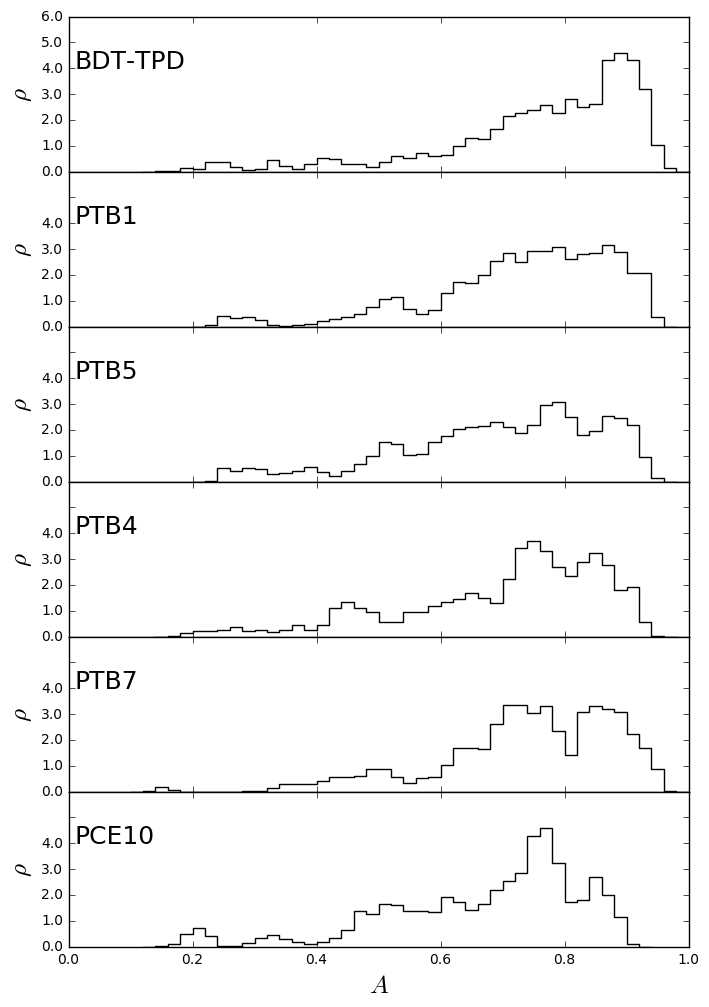

In [95]:
key_i  = 'A_sphere'

ms = 3
led_x = 0.015
led_y = 0.001
fontsz_leg = 16
fontsz_text = 18


fig, ax = plt.subplots(6,sharex=True)
#ax.plot(rgy_sq_vals.bin_val,rgy_sq_vals.hist_bin)
#ax.bar(rgy_sq_vals.bins_cent, rgy_sq_vals.hist_cent , align='center', width=rgy_sq_vals.bin_size)
i = 0
for name_i in name_l:
    calc_i = None 

    
    for tag_i,calc_o in proj_i.calculations.iteritems():
        if( calc_o.properties['name'] == name_i  ):
            calc_i = calc_o

    val_i = values.Values(key_i,calc_i.molts_df[key_i].values)
    val_i.calc_stats()
    val_i.set_bins(0.02)
    val_i.calc_hist()
    
    ax[i].plot(val_i.bins_steps,val_i.hist_steps,'k-',ls = "steps")
    
    ax[i].set_xlabel(r'$A$',fontsize=fontsz_text)
    ax[i].set_ylabel(r'$\rho$',fontsize=fontsz_text)
    ax[i].set_xlim(0,1.0)
    ax[i].set_ylim(0.0,6.0)
    ax[i].text(0.01,4.0,name_i,fontsize=fontsz_text)
    
    labels=ax[i].get_yticks().tolist()
    if( i > 0 ):
        labels[-1]=''
        labels[-2]=''

    ax[i].set_yticklabels(labels)    

    
    i+=1
    
#i += -1

fig.subplots_adjust(hspace=0.0)   
fig.set_size_inches(8.0, 12.0)

fig.savefig("%s_hist.pdf"%(key_i),format='pdf')



In [99]:
print calc_i.molts_df.columns

Index([u'frame', u'g_i', u'residue', u'Rgy_eignval', u'A_sphere',
       u'A_sphere_dem', u'r_gy_sq', u'total_mass', u'cent_mass', u'Q_mn',
       u'A_sphere_num', u'radius', u'mol', u'resname', u'dl_sq'],
      dtype='object')


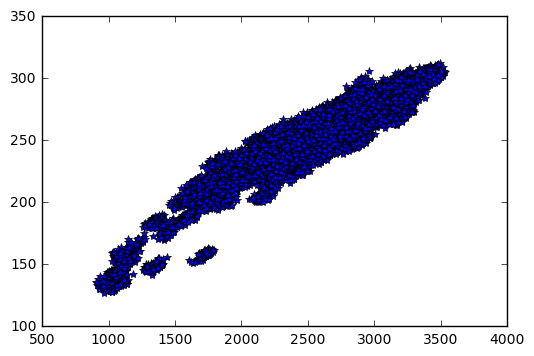

In [103]:
fig, ax = plt.subplots(1,sharex=True)

ax.plot(calc_i.molts_df['dl_sq'].values,calc_i.molts_df['r_gy_sq'].values,'*')



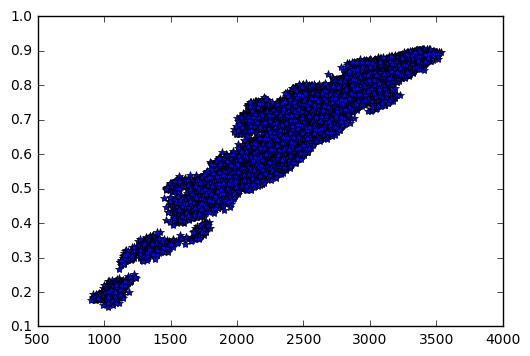

In [104]:
fig, ax = plt.subplots(1,sharex=True)

ax.plot(calc_i.molts_df['dl_sq'].values,calc_i.molts_df['A_sphere'].values,'*')



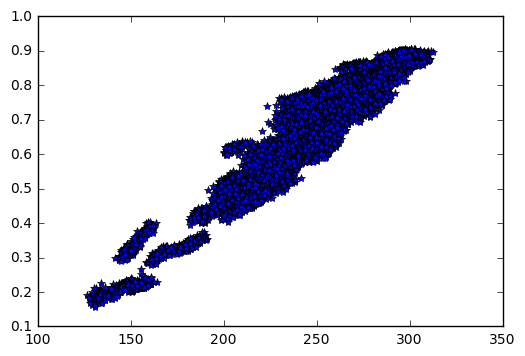

In [105]:
fig, ax = plt.subplots(1,sharex=True)

ax.plot(calc_i.molts_df['r_gy_sq'].values,calc_i.molts_df['A_sphere'].values,'*')



In [113]:
os.chdir('/Users/tkemper/Projects/DApolymers/tables')

In [117]:
table_lines = 'Polymer & $<r_{gy}^2>$ ($\sigma$) $\AA^2$ & $<l>$ ($\sigma$) $\AA$ & $<A>$ ($\sigma$) \\\\ \\hline \n'
for name_i in name_l:
    calc_i = None 
    for tag_i,calc_o in proj_i.calculations.iteritems():
        if( calc_o.properties['name'] == name_i  ):
            calc_i = calc_o
    val_i = values.Values(key_i,calc_i.molts_df[key_i].values)
    table_lines += ' %s '%(name_i)
    key_i = 'r_gy_sq'
    table_lines += '& %8.2f (%8.2e) '%(calc_i.molts_df[key_i].mean(),calc_i.molts_df[key_i].std())
    key_i = 'dl'
    table_lines += '& %8.2f (%8.2e) '%(calc_i.molts_df[key_i].mean(),calc_i.molts_df[key_i].std())
    key_i = 'A_sphere'
    table_lines += '& %8.2f (%8.2e) '%(calc_i.molts_df[key_i].mean(),calc_i.molts_df[key_i].std())
    table_lines += '\\\\ \n'

print table_lines
    
      
f = open('struc_prop.tex','w')
f.write(table_lines)
f.close()    
    

Polymer & $<r_{gy}^2>$ ($\sigma$) $\AA^2$ & $<l>$ ($\sigma$) $\AA$ & $<A>$ ($\sigma$) \\ \hline 
 BDT-TPD &   253.60 (3.74e+01) &    49.65 (6.22e+00) &     0.76 (1.62e-01) \\ 
 PTB1 &   255.48 (3.20e+01) &    49.60 (5.70e+00) &     0.73 (1.47e-01) \\ 
 PTB5 &   237.95 (3.78e+01) &    47.33 (6.30e+00) &     0.69 (1.64e-01) \\ 
 PTB4 &   236.37 (3.69e+01) &    47.45 (6.34e+00) &     0.70 (1.63e-01) \\ 
 PTB7 &   256.65 (3.02e+01) &    49.80 (5.45e+00) &     0.74 (1.43e-01) \\ 
 PCE10 &   246.46 (3.55e+01) &    49.16 (5.92e+00) &     0.67 (1.59e-01) \\ 



In [96]:
proj_i.dir['notebook'] = '/Users/tkemper/Projects/DApolymers/notebooks'
for tag,calc_i in proj_i.calculations.iteritems():
    calc_i.dir['notebook'] = '/Users/tkemper/Projects/DApolymers/notebooks'

In [97]:
for tag,calc_i in proj_i.calculations.iteritems():
    os.chdir(calc_i.dir['notebook'])
    calc_i.dump_json()
os.chdir(proj_i.dir['notebook'])
proj_i.dump_json()

{'files': {u'templates': {u'run': u'streamm_peregrine.pbs', u'compressed': u'D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_tsDAfs10_templates.tgz'}, u'input': {u'cply': u'D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193.cply', u'dcd': u'prod1_dump.dcd', u'py_script': u'timeseries2.py', u'list_i': u'DA.list', u'compressed': u'D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_tsDAfs10_input.tgz'}, u'scripts': {u'run': u'D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_tsDAfs10.pbs', u'compressed': u'D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_tsDAfs10_scripts.tgz'}, u'data': {}, u'output': {u'mol_time': u'mol.time', u'struc_time': u'Struc_D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_tsDAfs10.time', u'mol_cm_xyz': u'mol_cm.xyz', u'compressed': u'D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_tsDAfs10_output.tgz', u'log': u'D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_tsDAfs10.log'}}, 'meta': {u'date': u'2016-11-15T07:13:40.666788', u'status': u'stored', u'resour